In [1]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt  
import seaborn as sns 

In [2]:
from sklearn.datasets import load_iris 

In [3]:
df =pd.read_csv('iris.csv.xls')

In [4]:
df.sample(2)

,sepal_length,sepal_width,petal_length,petal_width,species
29,4.7,3.2,1.6,0.2,setosa
17,5.1,3.5,1.4,0.3,setosa


In [5]:
df.isnull().mean()

sepal_length    0.0
sepal_width     0.0
petal_length    0.0
petal_width     0.0
species         0.0
dtype: float64

In [6]:
from sklearn.preprocessing import LabelEncoder 
lb =LabelEncoder()

In [8]:
df['species']=lb.fit_transform(df['species'])

In [9]:
df.sample(4)

,sepal_length,sepal_width,petal_length,petal_width,species
54,6.5,2.8,4.6,1.5,1
119,6.0,2.2,5.0,1.5,2
63,6.1,2.9,4.7,1.4,1
15,5.7,4.4,1.5,0.4,0


In [10]:
#converting in binarayclassfication probelm 
df=df[df['species']!=0][['sepal_width','petal_length','species']]

In [12]:
df.sample(4)

,sepal_width,petal_length,species
51,3.2,4.5,1
147,3.0,5.2,2
128,2.8,5.6,2
65,3.1,4.4,1


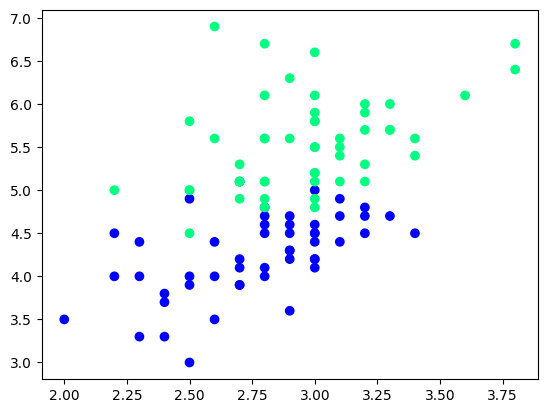

In [13]:
plt.scatter(df['sepal_width'],df['petal_length'],c=df['species'],cmap='winter')

In [14]:
df.shape

(100, 3)

In [16]:
df=df.sample(100)
df_train=df.iloc[:60,:].sample(10)   
df_val = df.iloc[60:80,:].sample(5)
df_test=df.iloc[80:,:].sample(5)

In [17]:
df_train

,sepal_width,petal_length,species
81,2.4,3.7,1
94,2.7,4.2,1
63,2.9,4.7,1
123,2.7,4.9,2
130,2.8,6.1,2
139,3.1,5.4,2
57,2.4,3.3,1
53,2.3,4.0,1
71,2.8,4.0,1
126,2.8,4.8,2


In [18]:
df_val

,sepal_width,petal_length,species
78,2.9,4.5,1
52,3.1,4.9,1
68,2.2,4.5,1
98,2.5,3.0,1
147,3.0,5.2,2


In [19]:
df_test

,sepal_width,petal_length,species
144,3.3,5.7,2
54,2.8,4.6,1
131,3.8,6.4,2
135,3.0,6.1,2
129,3.0,5.8,2


In [34]:
X_test=df_val.iloc[:,0:2].values 
y_test=df_val.iloc[:,-1].values

In [21]:
y_test

array([1, 1, 1, 1, 2])

<h1>Bagging case-1</h1>

<h1>Bootstrping </h1>

In [28]:
df_bag =df_train.sample(8,replace=True)
X=df_bag.iloc[:,0:2]
y=df_bag.iloc[:,-1]

df_bag

,sepal_width,petal_length,species
139,3.1,5.4,2
123,2.7,4.9,2
63,2.9,4.7,1
94,2.7,4.2,1
126,2.8,4.8,2
130,2.8,6.1,2
130,2.8,6.1,2
123,2.7,4.9,2


In [29]:
from sklearn.tree import DecisionTreeClassifier 
from sklearn.tree import plot_tree 
from mlxtend.plotting import plot_decision_regions 
from sklearn.metrics import accuracy_score

In [30]:
df_bag1 =DecisionTreeClassifier()

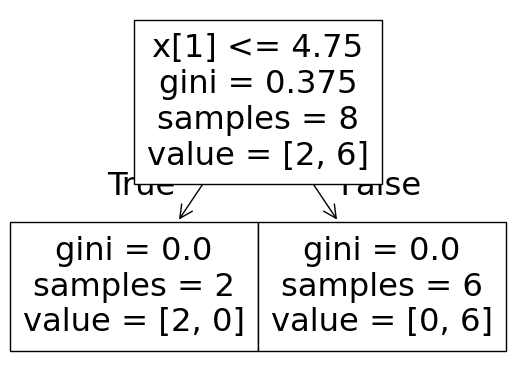

C:\Users\raj\anaconda3\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(
C:\Users\raj\anaconda3\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


0.8


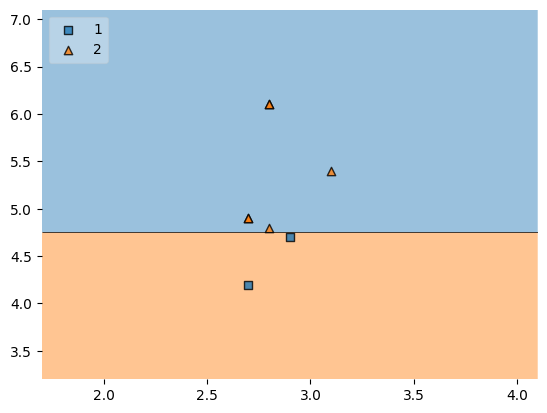

In [39]:
evaluate(df_bag1,X,y)

In [38]:
def evaluate(clf,X,y): 
    clf.fit(X,y)
    plot_tree(clf)
    plt.show() 
    plot_decision_regions(X.values,y.values,clf=clf,legend=2)
    y_pred=clf.predict(X_test)
    print(accuracy_score(y_test,y_pred))

In [43]:
df_bag2 =DecisionTreeClassifier()

In [47]:
df_bag =df_train.sample(8,replace=True)
X=df_bag.iloc[:,0:2]
y=df_bag.iloc[:,-1]

df_bag

,sepal_width,petal_length,species
139,3.1,5.4,2
123,2.7,4.9,2
71,2.8,4.0,1
94,2.7,4.2,1
63,2.9,4.7,1
53,2.3,4.0,1
94,2.7,4.2,1
63,2.9,4.7,1


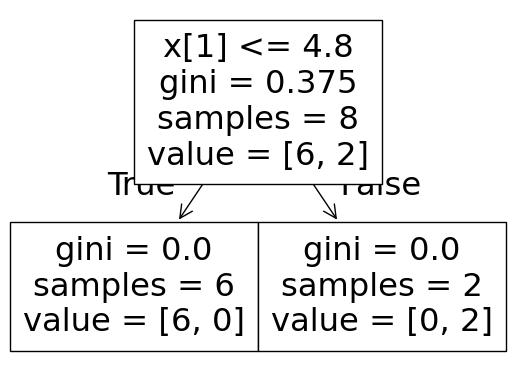

C:\Users\raj\anaconda3\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(
C:\Users\raj\anaconda3\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


0.8


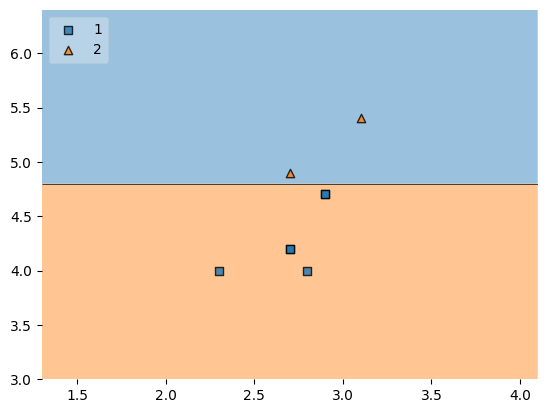

In [48]:
evaluate(df_bag2,X,y)

In [51]:
df_bag3 =DecisionTreeClassifier()

In [52]:
df_bag =df_train.sample(8,replace=True)
X=df_bag.iloc[:,0:2]
y=df_bag.iloc[:,-1]

df_bag

,sepal_width,petal_length,species
57,2.4,3.3,1
126,2.8,4.8,2
53,2.3,4.0,1
63,2.9,4.7,1
94,2.7,4.2,1
139,3.1,5.4,2
94,2.7,4.2,1
53,2.3,4.0,1


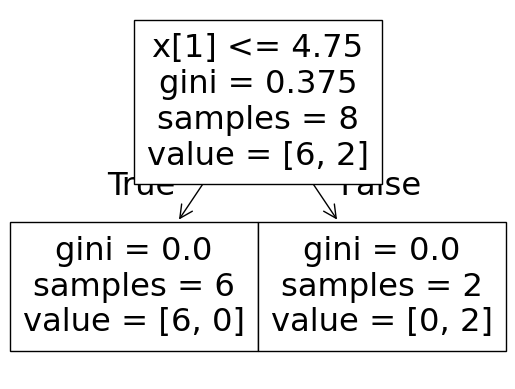

C:\Users\raj\anaconda3\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(
C:\Users\raj\anaconda3\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


0.8


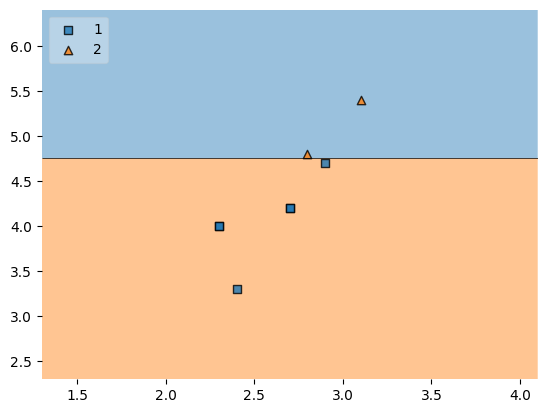

In [53]:
evaluate(df_bag3,X,y)

<h1>Aggregation</h1>

<h3>predict</h3>

In [50]:
df_test

,sepal_width,petal_length,species
144,3.3,5.7,2
54,2.8,4.6,1
131,3.8,6.4,2
135,3.0,6.1,2
129,3.0,5.8,2


In [63]:
print('prediction',df_bag1.predict(np.array([3.3,5.7]).reshape(1,2)))
print('prediction',df_bag2.predict(np.array([3.3,5.7]).reshape(1,2)))
print('prediction',df_bag3.predict(np.array([3.3,5.7]).reshape(1,2)))


prediction [2]
prediction [2]
prediction [2]


C:\Users\raj\anaconda3\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(
C:\Users\raj\anaconda3\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(
C:\Users\raj\anaconda3\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


In [59]:
np.array([3.3,5.7]).reshape(-1,1)

array([[3.3],
       [5.7]])

In [66]:
print('prediction',df_bag1.predict(np.array([2.8,4.6]).reshape(1,2)))
print('prediction',df_bag2.predict(np.array([2.8,4.6]).reshape(1,2)))
print('prediction',df_bag3.predict(np.array([2.8,4.6]).reshape(1,2)))


prediction [1]
prediction [1]
prediction [1]


C:\Users\raj\anaconda3\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(
C:\Users\raj\anaconda3\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(
C:\Users\raj\anaconda3\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


# types of baging 

# pasting

In [67]:
# row sampling withour pasting 

In [68]:
df_train.sample(8)

,sepal_width,petal_length,species
130,2.8,6.1,2
123,2.7,4.9,2
81,2.4,3.7,1
71,2.8,4.0,1
57,2.4,3.3,1
94,2.7,4.2,1
63,2.9,4.7,1
53,2.3,4.0,1


# random Subspaceing 